**Text Preprocessing**

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load datasets
ratings_df = pd.read_excel("FINAL jester 2006-15.xls", header=None)

# Add column names
ratings_df.columns = ["User"] + [f"joke{i}" for i in range(1, ratings_df.shape[1])]
ratings_df.set_index("User", inplace=True)

# Replace 99 with NaN (missing values indicator)
ratings_df.replace(99, np.nan, inplace=True)

# Identify and drop columns with only missing values
missing_cols = ratings_df.columns[ratings_df.isna().all()]
if not missing_cols.empty:
    print(f"Dropping columns with only missing values: {missing_cols.tolist()}")
    ratings_df = ratings_df.drop(columns=missing_cols)

# Handle missing values using IterativeImputer with robust initial strategy
imputer = IterativeImputer(
    max_iter=10, 
    random_state=42,
    initial_strategy='median',  # Changed from mean to median for robustness
    min_value=-10,  # Set reasonable bounds based on your data
    max_value=10
)
imputed_data = imputer.fit_transform(ratings_df)

# Create a new DataFrame with imputed values
ratings_df = pd.DataFrame(imputed_data, index=ratings_df.index, columns=ratings_df.columns)

# First use RobustScaler to handle outliers
robust_scaler = RobustScaler(quantile_range=(5, 95))  # Use 5th to 95th percentile
ratings_scaled = robust_scaler.fit_transform(ratings_df)
ratings_df = pd.DataFrame(ratings_scaled, index=ratings_df.index, columns=ratings_df.columns)

# Apply Power Transform to normalize the distribution
power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
ratings_normalized = power_transformer.fit_transform(ratings_df)
ratings_df = pd.DataFrame(ratings_normalized, index=ratings_df.index, columns=ratings_df.columns)

# Scale to 0-5 range while preserving distribution shape
def scale_to_range(data, target_min=0, target_max=5):
    current_min = np.min(data)
    current_max = np.max(data)
    scaled_data = ((data - current_min) / (current_max - current_min)) * (target_max - target_min) + target_min
    return scaled_data

ratings_df = pd.DataFrame(
    scale_to_range(ratings_df.values),
    index=ratings_df.index,
    columns=ratings_df.columns
)

# Save the preprocessed data
preprocessed_file_path = "Preprocessed_Ratings.xlsx"
ratings_df.to_excel(preprocessed_file_path)

print(f"Preprocessing complete. File saved at {preprocessed_file_path}")

Dropping columns with only missing values: ['joke1', 'joke2', 'joke3', 'joke4', 'joke6', 'joke9', 'joke10', 'joke11', 'joke12', 'joke14']


c:\Users\noora\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Preprocessing complete. File saved at Preprocessed_Ratings.xlsx


In [2]:
ratings_df.head(10)

,joke5,joke7,joke8,joke13,joke15,joke16,joke17,joke18,joke19,joke20,...,joke141,joke142,joke143,joke144,joke145,joke146,joke147,joke148,joke149,joke150
User,,,,,,,,,,,,,,,,,,,,,
62,2.952793,1.889828,1.810991,2.032467,2.687396,1.836799,1.788860,1.922505,1.807702,1.374711,...,0.873957,3.666050,3.318949,1.491053,2.587556,4.039254,3.637502,3.601030,1.822268,3.630952
34,0.937766,3.271906,3.278716,3.268066,2.653577,2.887873,3.216849,2.282225,1.754852,1.378799,...,2.647690,2.591804,3.121631,2.961630,2.311752,3.274049,2.688532,2.784296,3.758868,2.301760
18,0.903777,1.834094,1.976840,2.391685,1.793952,1.807642,1.734821,1.750459,1.741268,1.677820,...,1.755951,2.002480,2.150770,3.111931,2.459638,1.825785,2.148491,1.613352,2.252474,2.127421
82,4.149901,2.979972,2.081823,2.513063,2.311467,2.898035,2.915137,2.945443,2.896943,3.311852,...,0.873080,1.318065,3.616883,1.189477,3.451079,2.125734,2.789355,3.420726,2.352403,3.501600
27,2.905987,1.908199,2.516427,3.092509,2.040541,1.857090,2.424753,1.798375,2.691734,1.337933,...,1.665527,2.198052,3.636148,3.619846,3.641725,2.487593,2.225274,3.364906,2.360068,1.356060
46,2.352306,2.498599,2.509099,2.471142,2.784386,2.662821,2.481809,2.522444,2.514548,2.579897,...,2.500420,2.288142,1.232927,1.705909,1.125278,2.406818,2.733266,1.273374,1.505220,2.452006
99,4.030836,2.065944,2.484649,2.285993,2.662635,2.671674,2.596288,2.318207,2.081719,2.890000,...,2.196067,3.418672,3.638128,2.426853,1.694072,1.053446,1.060790,3.607697,2.724769,1.887663
15,4.380503,3.222013,3.229136,3.254606,3.243393,3.225240,3.160745,3.210647,1.756797,1.796977,...,2.839742,2.502425,3.084948,1.202291,1.658951,2.960954,3.138992,3.607697,2.287761,3.570809
104,1.775040,2.690638,2.608996,3.148916,2.876212,2.341585,2.479413,2.008360,2.668755,3.472880,...,3.757126,1.824514,1.268044,1.131634,1.194871,0.853604,3.829179,3.607697,3.676185,3.235149


c:\Users\noora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


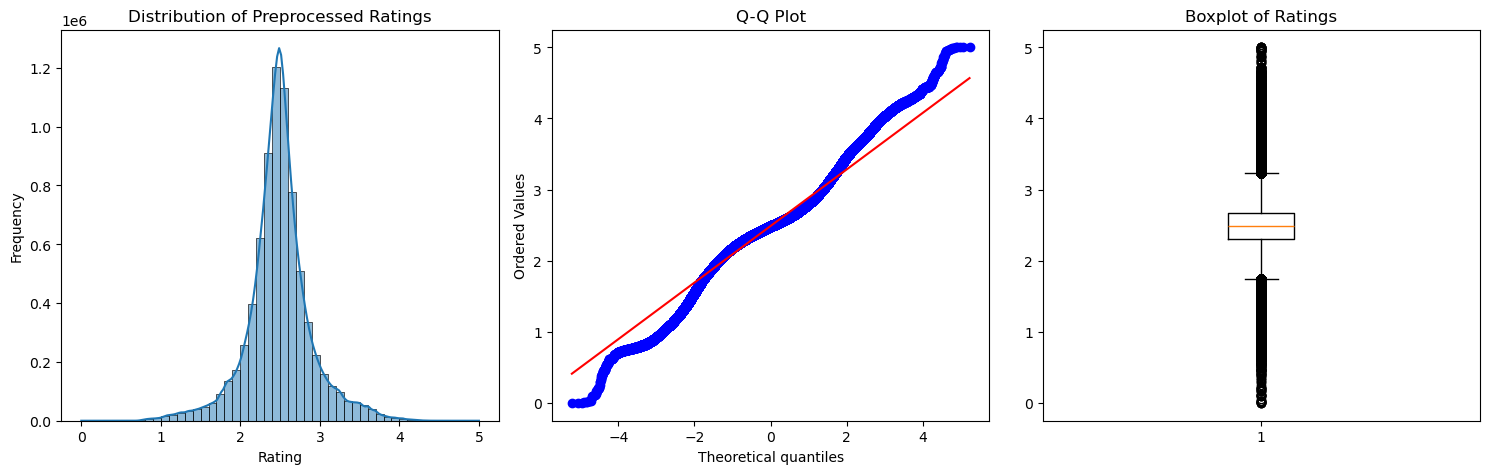


Distribution Statistics:
Mean: 2.49
Median: 2.48
Std Dev: 0.41
Skewness: 0.04
Kurtosis: 2.33


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# Plot distribution of all ratings
all_ratings = ratings_df.values.flatten()
plt.subplot(1, 3, 1)
sns.histplot(all_ratings, kde=True, bins=50)
plt.title("Distribution of Preprocessed Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")

# Plot Q-Q plot
plt.subplot(1, 3, 2)
stats.probplot(all_ratings, dist="norm", plot=plt)
plt.title("Q-Q Plot")

# Plot boxplot
plt.subplot(1, 3, 3)
plt.boxplot(all_ratings)
plt.title("Boxplot of Ratings")

plt.tight_layout()
plt.show()

# Print distribution statistics
print("\nDistribution Statistics:")
print(f"Mean: {np.mean(all_ratings):.2f}")
print(f"Median: {np.median(all_ratings):.2f}")
print(f"Std Dev: {np.std(all_ratings):.2f}")
print(f"Skewness: {stats.skew(all_ratings):.2f}")
print(f"Kurtosis: {stats.kurtosis(all_ratings):.2f}")